In [44]:
%pip install pandas --user
%pip install seaborn --user
%pip install matplotlib --user
%pip install sklearn --user

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# **Primera entrega del proyecto final**

---

**Tema**

Detección de tabaquismo

---

**Integrantes**


*   Pablo Perera
*   Leonardo Rosa
*   Christian Aldana
*   Eduardo Gonzalez




###**Problemática**


 **Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)**

* Dataset https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

* Criterios de selección:
Para el presente trabajo se realizó una búsqueda de los dataset que realmente fuera de nuestro interés, cuyo objetivo sea también de un interés del ámbito social, que nos genere un valor agregado con miras siempre a una mejora continua y que pueda plantearse un modelo Data Science que iremos construyendo durante las próximas iteraciones.

Consideramos importante que los datos se adecuaran a los requerimientos en cuanto a calidad y cantidad para un mejor análisis, entre ellas que tenga una cantidad suficiente de variables numéricas y también categóricas, que no tenga o bien tenga una cantidad reducida de datos nulos.

Nuestro set contiene el impacto del tabaquismo en la salud de las personas, lo anterior llevado desde el punto de vista de parámetros hematológicos los que presentan efectos adversos si es considerado con los límites que se presenta en una población sana. Estas alteraciones se podrían asociar a un mayor riesgo de desarrollar ciertas enfermedades. 

### **Variables**

---

*   ID : Indice
*   gender : Género (M/F)
*   age : Edad, categórica (rangos de 5 años)
*   height(cm) : Altura
*   weight(kg) : Peso
*   waist(cm) : Diamátro de circunferencia del abdomen
*   eyesight(left) : Visión izquierda
*   eyesight(right) : Visión derecha
*   hearing(left) : Audición izquierda
*   hearing(right) : Audición derecha
*   systolic : Presión arterial
*   relaxation : Pulso
*   fasting blood sugar : Azucar en sangre (glicemia) 
*   Cholesterol : Colesterol
*   triglyceride : triglicéridos
*   HDL : Tipo de colesterol HDL
*   LDL : Tipo de colesterol LDL
*   hemoglobin : Hemoglobina
*   Urine protein : Proteina en orina
*   serum creatinine : Suero de creatinina
*   AST : Tipo transaminasa glutámico oxaloacético AST
*   ALT : Tipo transaminasa glutámico oxaloacético ALT
*   Gtp : Trifosfato de guanosina
*   oral : Tiene examinación oral
*   dental caries : Tiene caries
*   tartar : Tiene sarro

**Variable target**
*   smoking : Es fumador.





#Librerías

**Importamos las librerias y leemos el dataset**

Aquí importamos las distintas librerías que vamos a utlilizar en el proyecto.






In [45]:
#Importamos las Librerías

#LIBRERIAS BASICAS
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from numpy import mean
from numpy import std

#PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#SCALER
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score

#KNN
from sklearn.neighbors import KNeighborsClassifier

#RANDOM FOREST Y DECISION TREE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, export_text

#REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

#SVC
from sklearn import svm
from sklearn.kernel_approximation import Nystroem
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC, SVC



#HYPERTUNNING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#METRICAS
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


Montamos el drive y lo cargamos utilizando read_csv


In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

In [47]:
# path_drive = '/content/drive/MyDrive/Coder House - Proyecto Data Science/Dataset/smoking.csv'
path_local = './dataset/smoking.csv'
df = pd.read_csv(path_local)

#**Data Wrangling**

**Filtros aplicados a los datos. Distribución. Dataset final para analizar.**


Veriificamos esquema del dataset

In [48]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Renombramos las columnas utilizando snake_case y traducimos al español.

In [49]:
df.rename(columns = {'ID':'id', 
                     'gender':'genero',
                     'age':'edad',
                     'height(cm)':'altura',
                     'weight(kg)':'peso',
                     'waist(cm)':'circunferencia_cintura',
                     'eyesight(left)':'vision_izquierda',
                     'eyesight(right)':'vision_derecha',
                     'hearing(left)':'audicion_izquierda',
                     'hearing(right)':'audicion_derecha',
                     'systolic':'presion_arterial',
                     'relaxation':'pulso',
                     'fasting blood sugar':'glucemia',
                     'Cholesterol':'colesterol',
                     'triglyceride':'triglicéridos',
                     'HDL':'colesterol_hdl',
                     'LDL':'colesterol_ldl',
                     'hemoglobin':'hemoglobina',
                     'Urine protein':'proteinuria',
                     'serum creatinine':'creatinina',
                     'AST':'got_ast',
                     'ALT':'got_alt',
                     'Gtp':'gtp',
                     'oral':'revision_oral',
                     'dental caries':'caries',
                     'tartar':'sarro',
                     'smoking':'es_fumador'}, inplace = True)


Cambiamos el Y/N de oral y tartar por 0 y 1 para facilitar el análisis posterior. 



In [50]:
# Reemplazo data de dos variables, para que sea 1 o 0.
df['sarro'] = df['sarro'].map({'Y': 1, 'N': 0})
df['revision_oral'] = df['revision_oral'].map({'Y': 1, 'N': 0})

# **Exploratory Data Analysis**

**Estadísticas generales del dataset**

Generamos estadísticas básicas del dataset para ver la distribución y composición de los datos

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
edad,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
altura,55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
peso,55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
circunferencia_cintura,55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
vision_izquierda,55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
vision_derecha,55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
audicion_izquierda,55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
audicion_derecha,55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
presion_arterial,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55692 non-null  int64  
 1   genero                  55692 non-null  object 
 2   edad                    55692 non-null  int64  
 3   altura                  55692 non-null  int64  
 4   peso                    55692 non-null  int64  
 5   circunferencia_cintura  55692 non-null  float64
 6   vision_izquierda        55692 non-null  float64
 7   vision_derecha          55692 non-null  float64
 8   audicion_izquierda      55692 non-null  float64
 9   audicion_derecha        55692 non-null  float64
 10  presion_arterial        55692 non-null  float64
 11  pulso                   55692 non-null  float64
 12  glucemia                55692 non-null  float64
 13  colesterol              55692 non-null  float64
 14  triglicéridos           55692 non-null

**Distribución de los datos**

Graficamos histogramas para comprobar la distribución de las variables contínuas. También generamos una lista llamada num_list para que sea más fácil acceder a ellas.

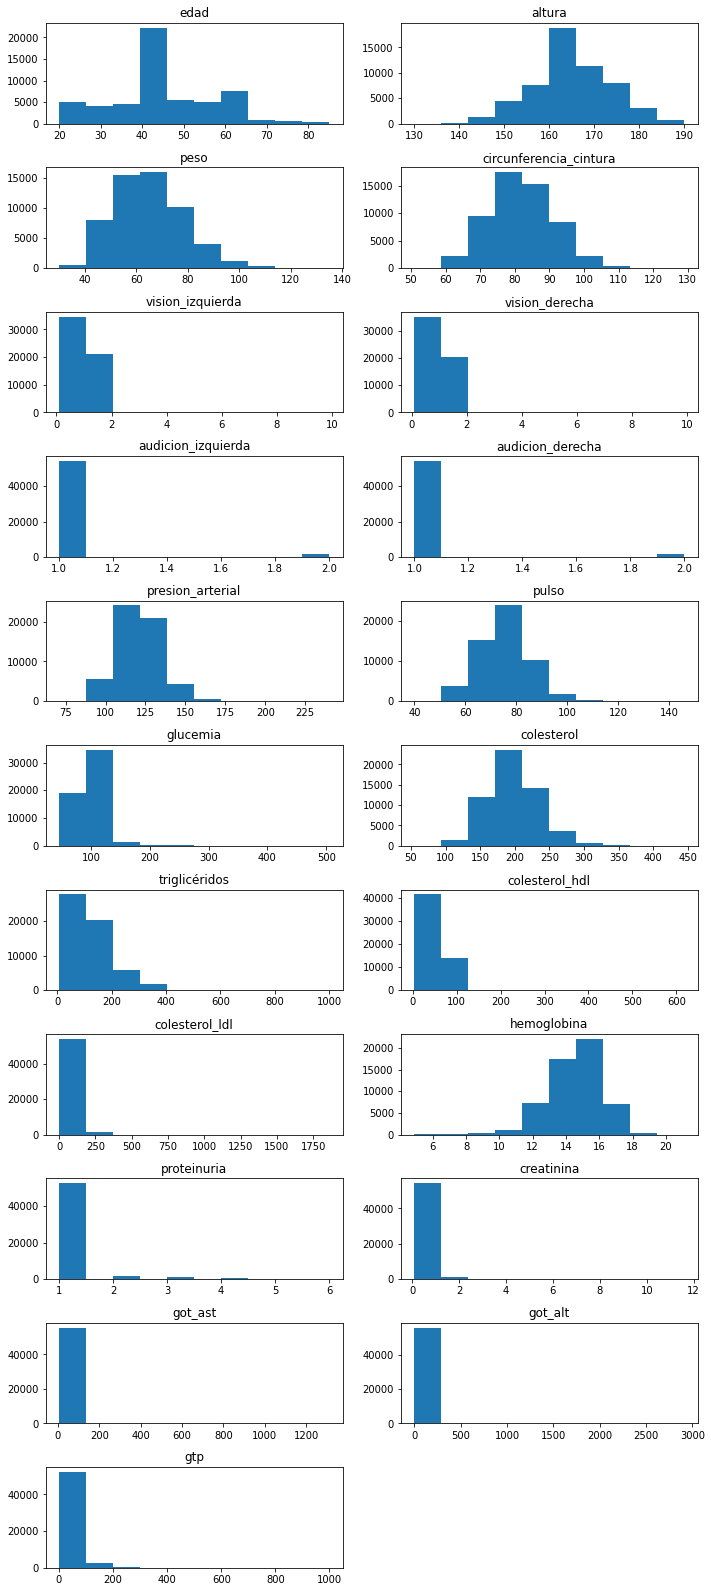

In [53]:
num_list = [
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'audicion_izquierda',
            'audicion_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'triglicéridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'proteinuria',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]
           
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

En la gráfica de arriba podemos observar que varias de las variables no presentan distribuciones normales, y que varias de ellas poseen outliers por ejemplo la audición. 

Validamos los valores únicos por cada columna, podemos ver en el histograma que algunas, tienen pocos datos únicos.

In [54]:
df.nunique()

id                        55692
genero                        2
edad                         14
altura                       13
peso                         22
circunferencia_cintura      566
vision_izquierda             19
vision_derecha               17
audicion_izquierda            2
audicion_derecha              2
presion_arterial            130
pulso                        95
glucemia                    276
colesterol                  286
triglicéridos               390
colesterol_hdl              126
colesterol_ldl              289
hemoglobina                 145
proteinuria                   6
creatinina                   38
got_ast                     219
got_alt                     245
gtp                         488
revision_oral                 1
caries                        2
sarro                         2
es_fumador                    2
dtype: int64

Transformamos el dataset, eliminando aquellas columnas que no son reelevantes para el estudio. 

Tambien actualizamos la variable num_list.

In [55]:
df = df.drop(['audicion_izquierda', 'audicion_derecha','proteinuria'], axis = 1)

num_list = [
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'triglicéridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]

**Outliers**
Calculamos percentil 99.5 y máximo de cada columna, para poder detectar outliers

In [56]:
for i in range(len(num_list)):
    print(f'Percentil 99.5 : {df[num_list[i]].quantile(0.995)} - Max {df[num_list[i]].quantile(1)}')


Percentil 99.5 : 80.0 - Max 85.0
Percentil 99.5 : 185.0 - Max 190.0
Percentil 99.5 : 105.0 - Max 135.0
Percentil 99.5 : 109.0 - Max 129.0
Percentil 99.5 : 2.0 - Max 9.9
Percentil 99.5 : 2.0 - Max 9.9
Percentil 99.5 : 165.0 - Max 240.0
Percentil 99.5 : 107.0 - Max 146.0
Percentil 99.5 : 223.0 - Max 505.0
Percentil 99.5 : 306.0 - Max 445.0
Percentil 99.5 : 381.0 - Max 999.0
Percentil 99.5 : 106.0 - Max 618.0
Percentil 99.5 : 216.0 - Max 1860.0
Percentil 99.5 : 18.0 - Max 21.1
Percentil 99.5 : 1.4 - Max 11.6
Percentil 99.5 : 103.54499999999825 - Max 1311.0
Percentil 99.5 : 137.0 - Max 2914.0
Percentil 99.5 : 328.0 - Max 999.0


Vemos que vision_izquierda, vision_derecha, triglicéridos, colesterol_hdl, colesterol_ldl, got_ast, got_alt y gtp contienen valores máximos muy despegados al percentil 99.5, por lo tanto procedemos a eliminar esos datos outliers.

In [57]:
df = df[df['vision_izquierda'] <= 2]
df = df[df['vision_derecha'] <= 2]
df = df[df['triglicéridos'] <= 381]
df = df[df['colesterol_hdl'] <= 106]
df = df[df['colesterol_ldl'] <= 216]
df = df[df['got_ast'] <= 103.54499999999825]
df = df[df['got_alt'] <= 137.0]
df = df[df['gtp'] <= 328]

Generamos nuevamente los histogramas para ver como cambia la distribución luego de eliminar los datos outliers.

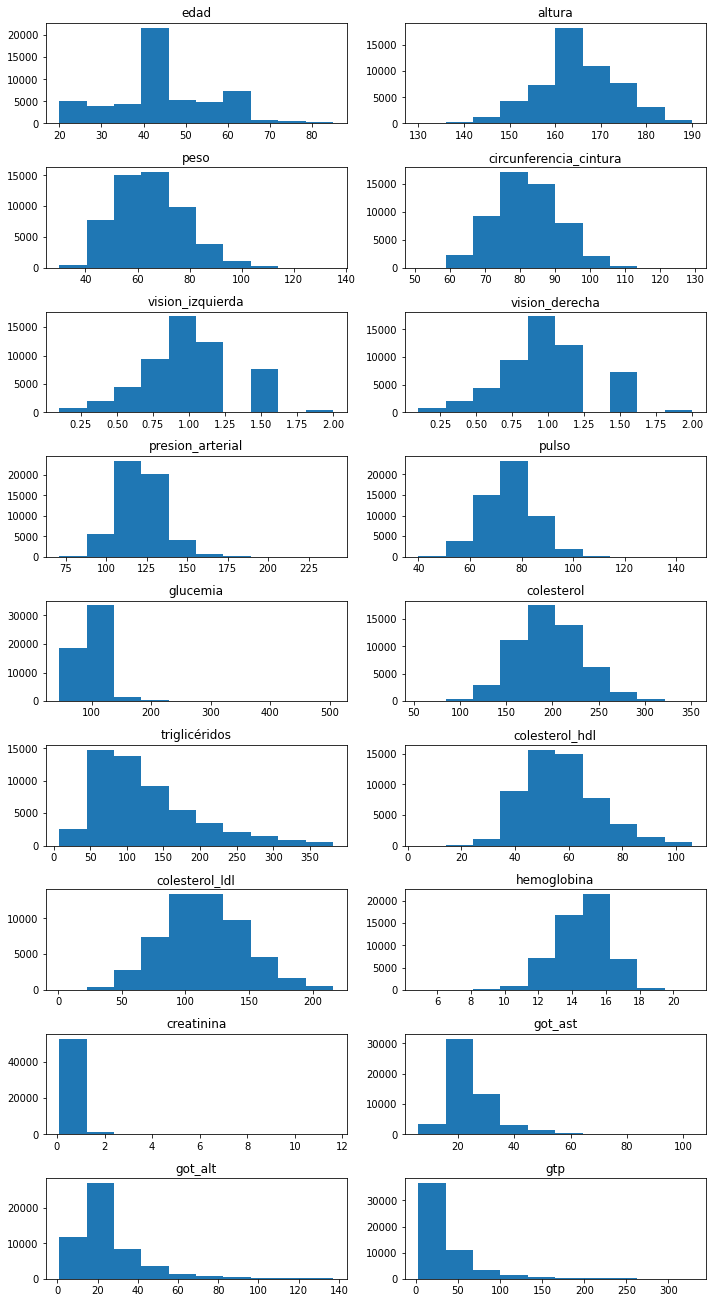

In [58]:
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]])

plt.tight_layout()

Ahora todas las variables tienen una distribución más homogenea y normal. 

### **Análisis Univariado**

Generamos un nuevo dataframe con las variables contínuas y generamos histograma con frecuencias. 

In [59]:
num_list_df = df[[
            'edad',
            'altura',
            'peso',
            'circunferencia_cintura',
            'vision_izquierda',
            'vision_derecha',
            'presion_arterial',
            'pulso',
            'glucemia',
            'colesterol',
            'triglicéridos',
            'colesterol_hdl',
            'colesterol_ldl',
            'hemoglobina',
            'creatinina',
            'got_ast',
            'got_alt',
            'gtp'
           ]]

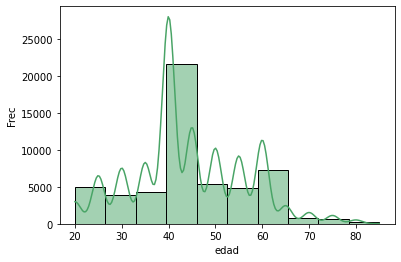

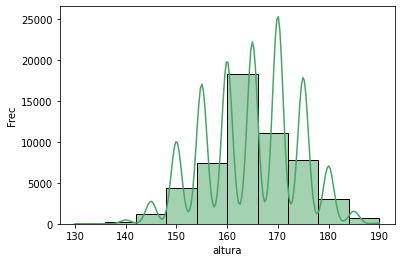

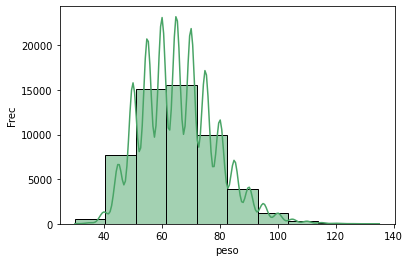

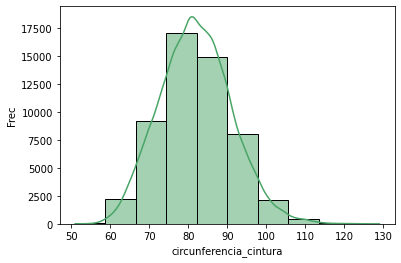

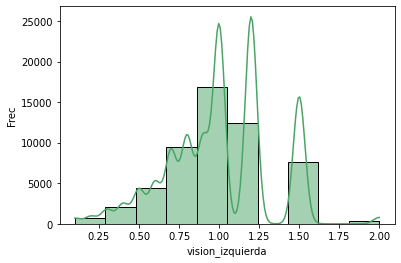

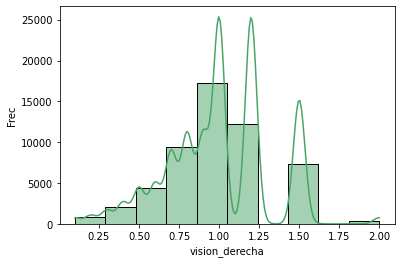

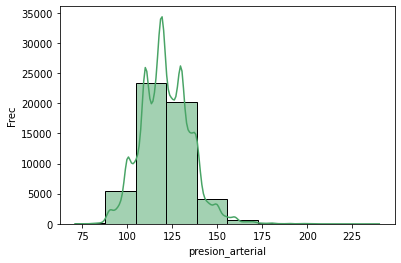

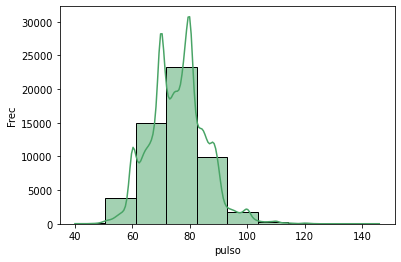

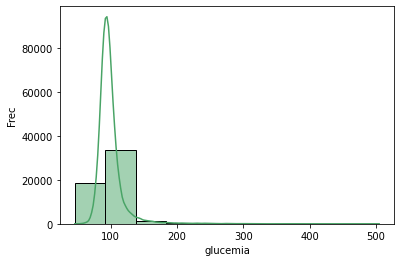

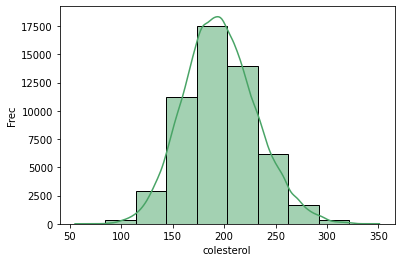

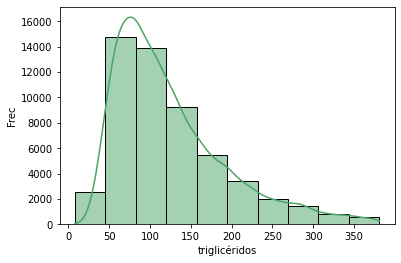

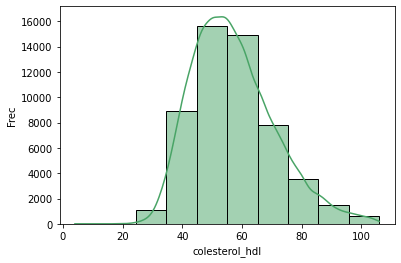

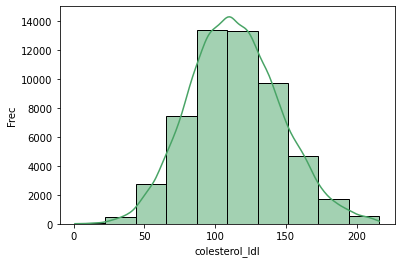

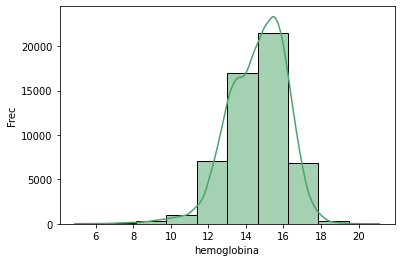

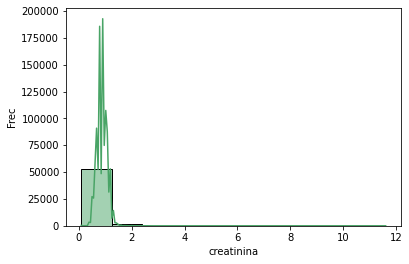

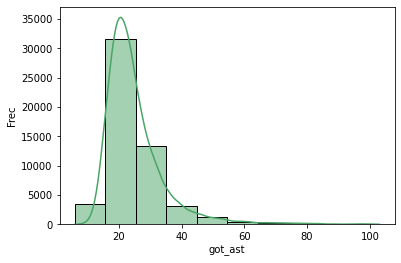

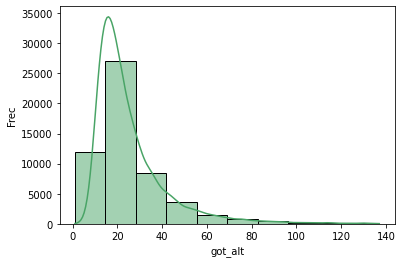

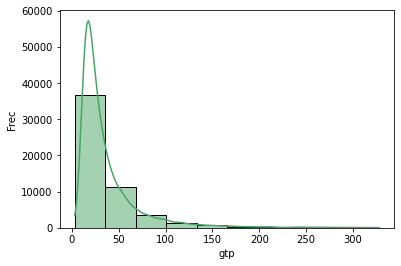

In [60]:
for i in num_list_df:
    ax = sns.histplot(df[i], bins= 10, kde= True, color='#49a466') 
    ax.set(ylabel='Frec')
    plt.show()


Generamos gráfica de violín

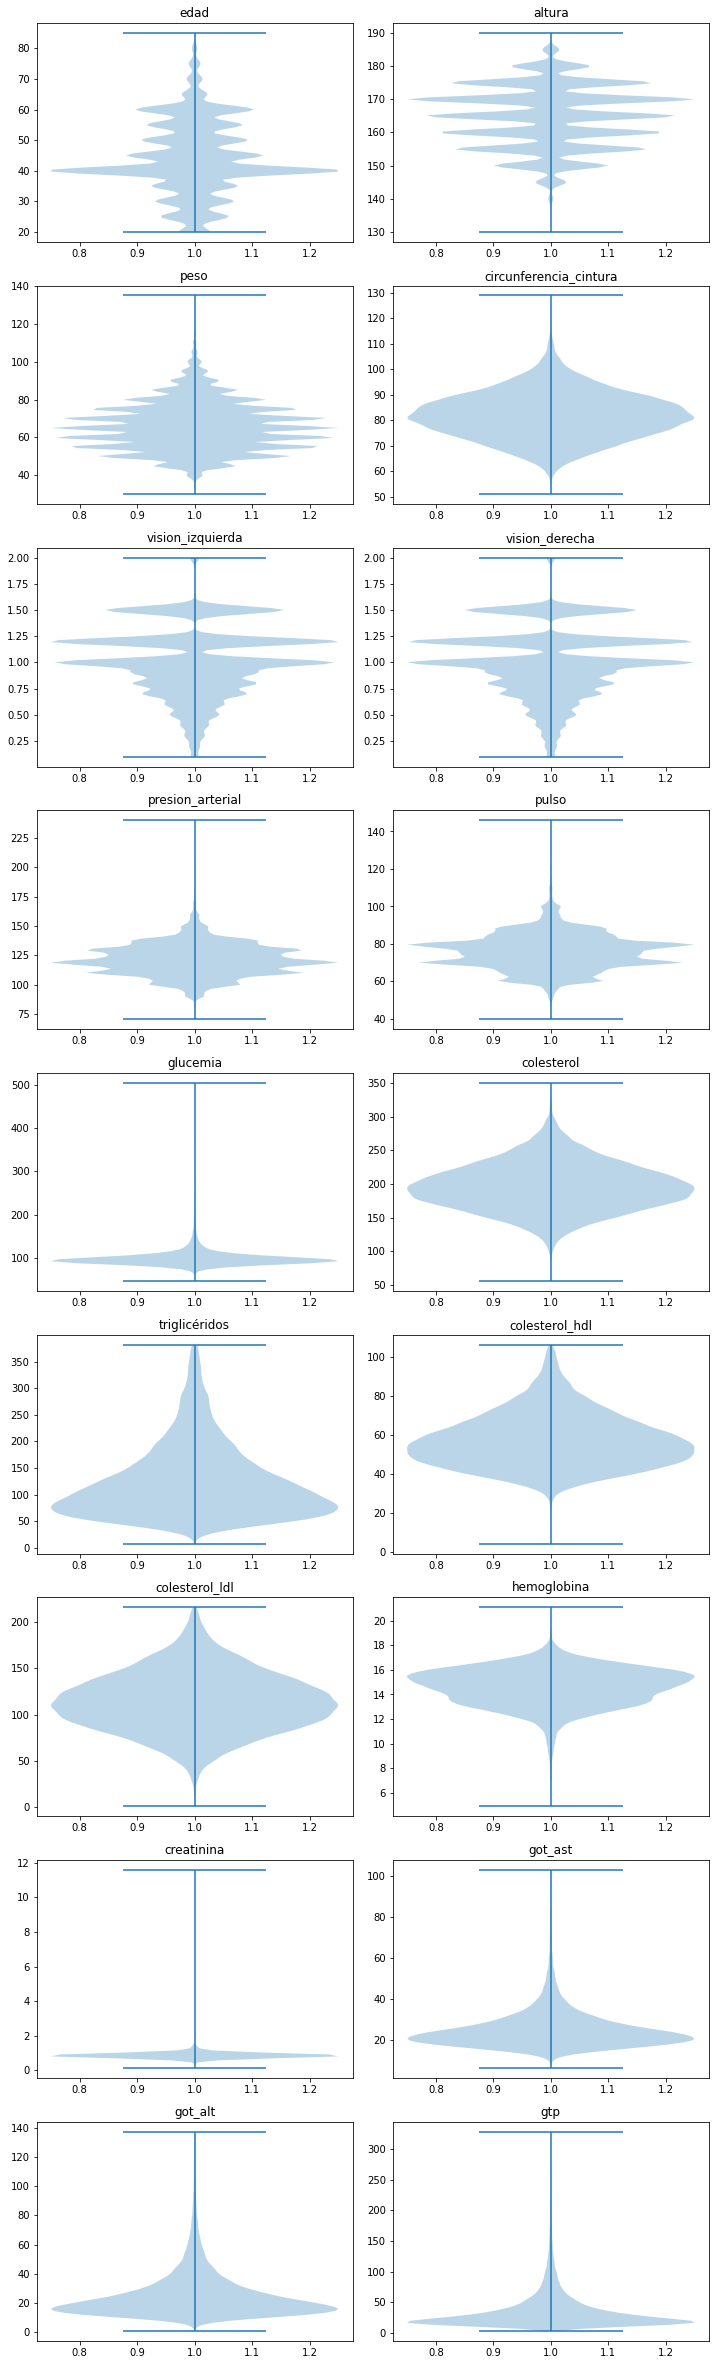

In [61]:
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list)):
    plt.subplot(11,2,i+1)
    plt.title(num_list[i])
    plt.violinplot(df[num_list[i]])

plt.tight_layout()


Con los gráficos de arriba podemos ver que tenemos bastantes distribuciones sesgadas y otras más normales


###**Análisis Bivariado**

Generamos boxplots de fumadores y no fumadores, para entender si hay variables que tengan diferencia segun si fuman o no.

<AxesSubplot:xlabel='gtp', ylabel='es_fumador'>

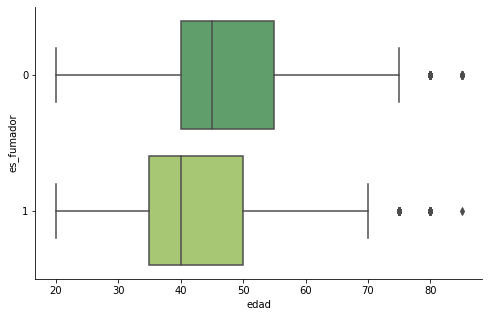

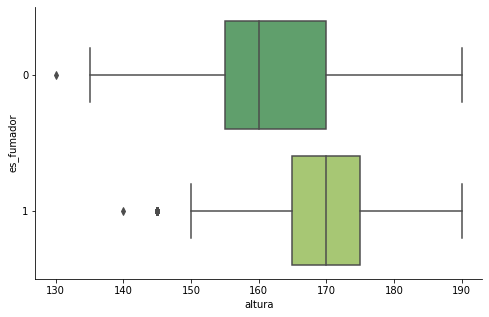

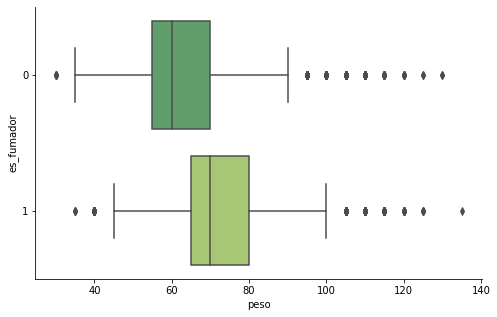

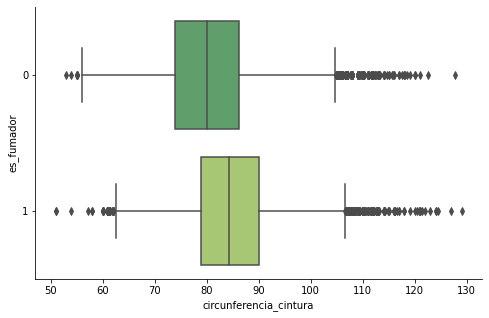

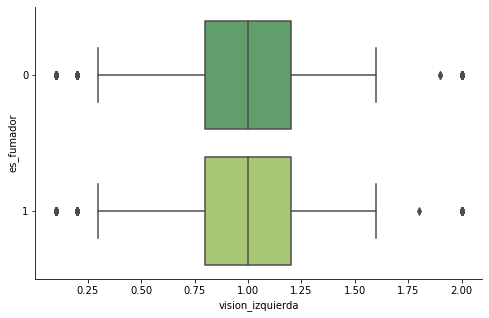

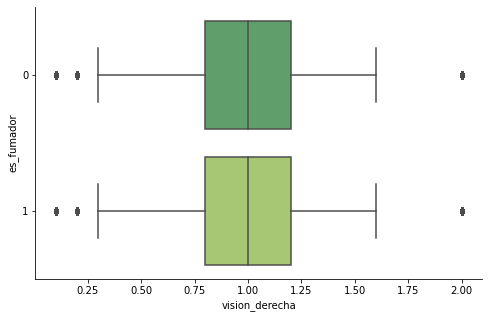

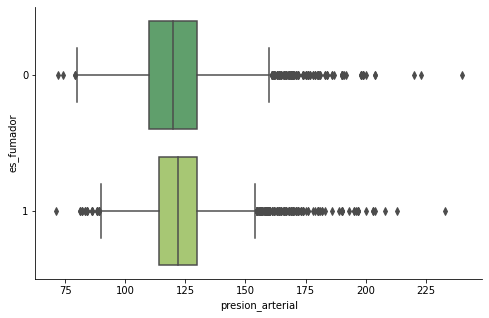

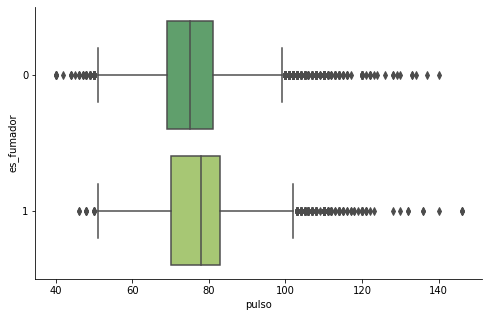

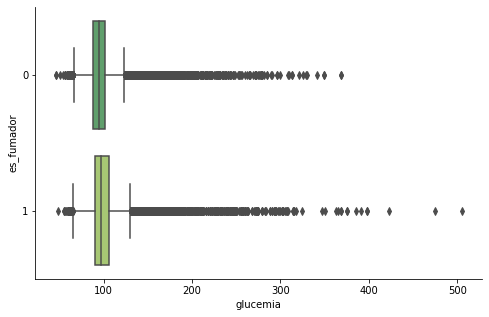

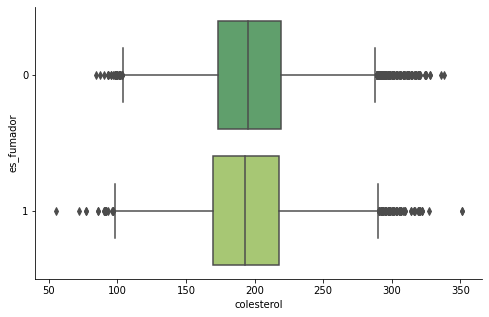

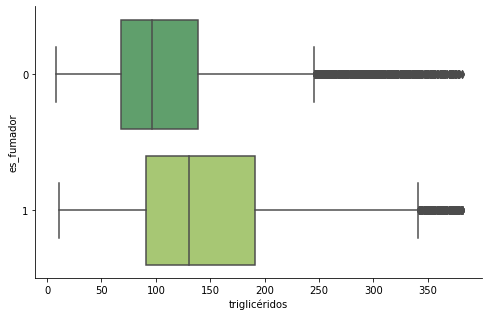

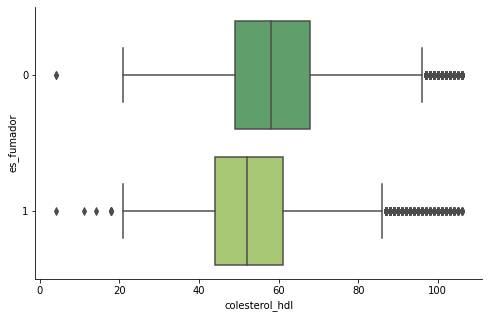

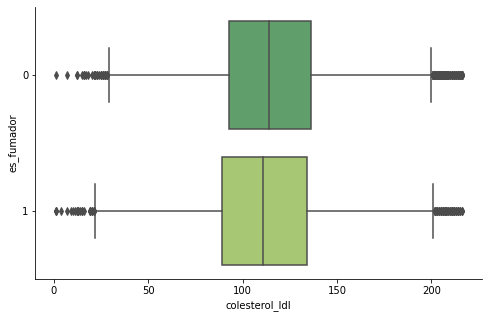

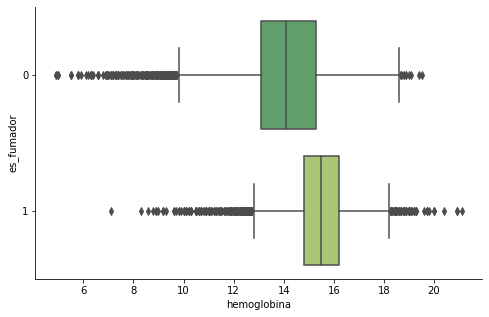

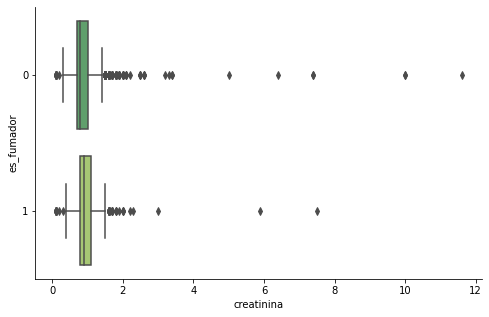

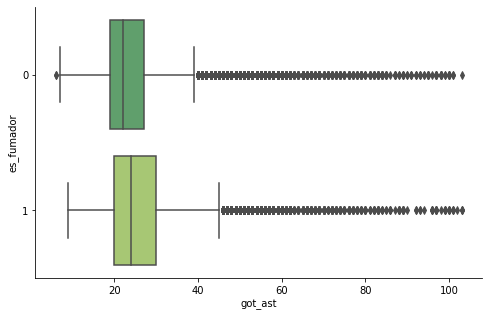

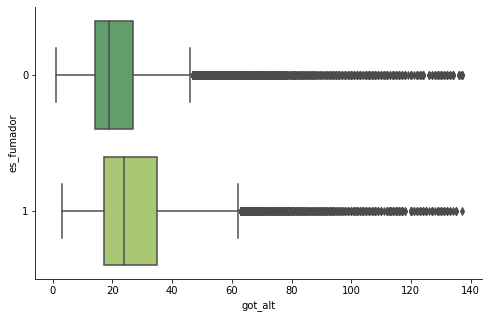

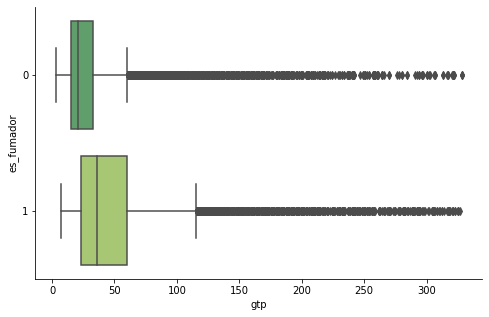

In [62]:
f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='edad',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='altura',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='peso',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='circunferencia_cintura',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='vision_izquierda',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='vision_derecha',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='presion_arterial',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='pulso',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='glucemia',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='triglicéridos',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol_hdl',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='colesterol_ldl',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='hemoglobina',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='creatinina',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='got_ast',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='got_alt',data=df, orient="h", palette="summer")

f, ax = plt.subplots(figsize=(8, 5))
sns.despine(f)

sns.boxplot(y="es_fumador", x='gtp',data=df, orient="h", palette="summer")

**Interpretacion de los boxplots**

Los fumadores tienen una media de edad menor. 
Tambien tienen una media de altura y peso superior. Particularmente en el peso se presentan bastantes datos outliers, en consecuencia de lo anterior, la circunferencia de cintura es mayor. 

La visión izquierda y derecha no presentan muchas diferencias y parecieran comportarse igual en fumadores y no fumadores, al igual que la presión arterial -la cual presenta bastantes outliers- asi como la glucemia 

El colesterol (las tres variables asociadas) es levemente más bajo en fumadores. 

Los triglicéridos más altos en fumadores

La hemoglobina es significativamente más alta en fumadores, al igual que el got_alt y gtp. 

El resto de las variables en principio no presentan mayor diferencia.

### **Análisis multivariado**

Generamos mapa de calor con las correlaciónes para entender 

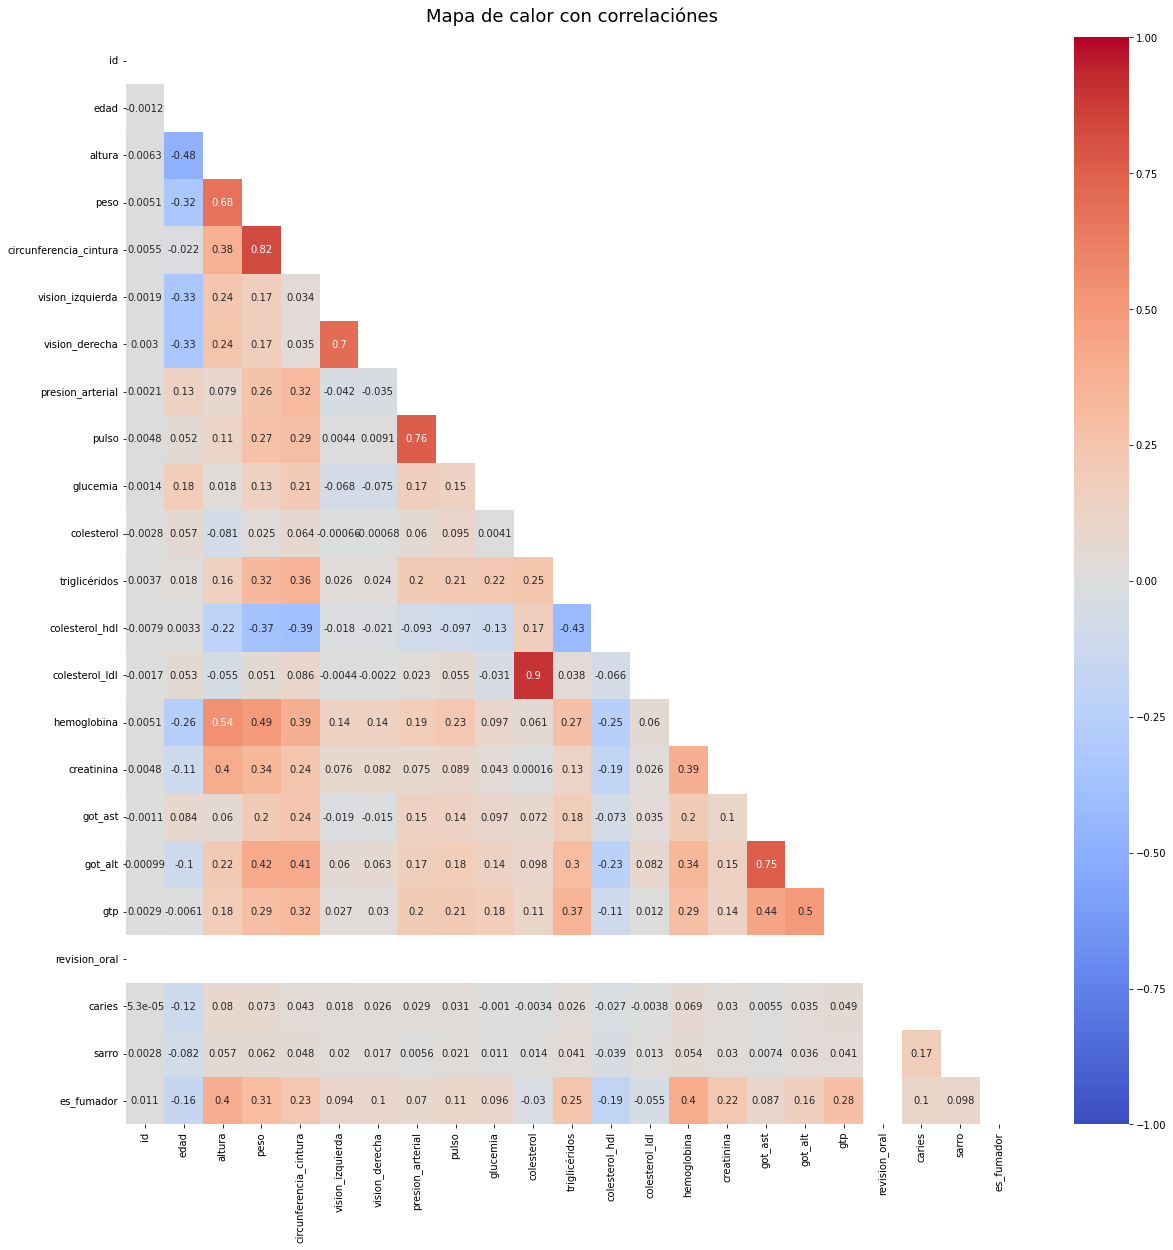

In [63]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2g')
heatmap.set_title('Mapa de calor con correlaciónes', fontdict={'fontsize':18}, pad=16);

En el gráfico podemos ver que la mayoría de las variables no presentan demasiada correlación, y aquellas que si lo hacen estan bastantes relacionadas, por ejemplo: 



*   pulso y presion arterial
*   got_ast y got_alt
*   circunferencia_cintura y peso
*   colesterol_ldl y colesterol


 
 

# **PCA**

Obtenemos dummies del dataset para utilizar el PCA 


In [64]:
df

,id,genero,edad,altura,peso,circunferencia_cintura,vision_izquierda,vision_derecha,presion_arterial,pulso,...,colesterol_ldl,hemoglobina,creatinina,got_ast,got_alt,gtp,revision_oral,caries,sarro,es_fumador
0,0,F,40,155,60,81.3,1.2,1.0,114.0,73.0,...,126.0,12.9,0.7,18.0,19.0,27.0,1,0,1,0
1,1,F,40,160,60,81.0,0.8,0.6,119.0,70.0,...,127.0,12.7,0.6,22.0,19.0,18.0,1,0,1,0
2,2,M,55,170,60,80.0,0.8,0.8,138.0,86.0,...,151.0,15.8,1.0,21.0,16.0,22.0,1,0,0,1
4,4,F,40,155,60,86.0,1.0,1.0,120.0,74.0,...,107.0,12.5,0.6,16.0,14.0,22.0,1,0,0,0
5,5,M,30,180,75,85.0,1.2,1.2,128.0,76.0,...,129.0,16.2,1.2,18.0,27.0,33.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,110.0,68.0,...,118.0,12.3,0.6,14.0,7.0,10.0,1,1,1,0
55688,55681,F,45,160,50,70.0,1.2,1.2,101.0,62.0,...,79.0,14.0,0.9,20.0,12.0,14.0,1,0,1,0
55689,55683,F,55,160,50,68.5,1.0,1.2,117.0,72.0,...,63.0,12.4,0.5,17.0,11.0,12.0,1,0,0,0
55690,55684,M,60,165,60,78.0,0.8,1.0,133.0,76.0,...,146.0,14.4,0.7,20.0,19.0,18.0,1,0,0,0


In [65]:
df_dummy = pd.get_dummies(df)

In [66]:
df_dummy

,id,edad,altura,peso,circunferencia_cintura,vision_izquierda,vision_derecha,presion_arterial,pulso,glucemia,...,creatinina,got_ast,got_alt,gtp,revision_oral,caries,sarro,es_fumador,genero_F,genero_M
0,0,40,155,60,81.3,1.2,1.0,114.0,73.0,94.0,...,0.7,18.0,19.0,27.0,1,0,1,0,1,0
1,1,40,160,60,81.0,0.8,0.6,119.0,70.0,130.0,...,0.6,22.0,19.0,18.0,1,0,1,0,1,0
2,2,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,...,1.0,21.0,16.0,22.0,1,0,0,1,0,1
4,4,40,155,60,86.0,1.0,1.0,120.0,74.0,80.0,...,0.6,16.0,14.0,22.0,1,0,0,0,1,0
5,5,30,180,75,85.0,1.2,1.2,128.0,76.0,95.0,...,1.2,18.0,27.0,33.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,40,170,65,75.0,0.9,0.9,110.0,68.0,89.0,...,0.6,14.0,7.0,10.0,1,1,1,0,1,0
55688,55681,45,160,50,70.0,1.2,1.2,101.0,62.0,89.0,...,0.9,20.0,12.0,14.0,1,0,1,0,1,0
55689,55683,55,160,50,68.5,1.0,1.2,117.0,72.0,88.0,...,0.5,17.0,11.0,12.0,1,0,0,0,1,0
55690,55684,60,165,60,78.0,0.8,1.0,133.0,76.0,107.0,...,0.7,20.0,19.0,18.0,1,0,0,0,0,1


Dividimos el dataset en variables features y target

In [67]:
X = df_dummy.drop(columns=["es_fumador"])
y = df_dummy.es_fumador

Estandarizamos las features

In [68]:
sc = StandardScaler()
X_pca = sc.fit_transform(X)

Generamos PCA utilizando dos componentes

In [69]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)
pca_df = pd.DataFrame(data = principalComponents, columns = ['p_comp_1', 'p_comp_2'])

pca_df

,p_comp_1,p_comp_2
0,-2.605639,-0.045093
1,-2.169707,1.062164
2,0.782820,1.160008
3,-2.783556,-0.194196
4,2.635342,-1.152360
...,...,...
54091,-2.838120,-0.938996
54092,-3.178796,-2.054715
54093,-4.025436,-1.024903
54094,-0.369778,0.618029


In [70]:
print('Explained variance:\n', pca.explained_variance_)

print('Explained variance ratio:\n', pca.explained_variance_ratio_)

Explained variance:
 [5.61790423 2.59051173]
Explained variance ratio:
 [0.24425219 0.11262886]


el PCA utilizando 2 variables, nos explica el 70% variación del dataset

In [71]:
df_dummy_2 = df_dummy.reset_index()

In [72]:
pca_df = pd.concat([pca_df, df_dummy_2[['es_fumador']]], axis = 1)

pca_df

,p_comp_1,p_comp_2,es_fumador
0,-2.605639,-0.045093,0
1,-2.169707,1.062164,0
2,0.782820,1.160008,1
3,-2.783556,-0.194196,0
4,2.635342,-1.152360,0
...,...,...,...
54091,-2.838120,-0.938996,0
54092,-3.178796,-2.054715,0
54093,-4.025436,-1.024903,0
54094,-0.369778,0.618029,0


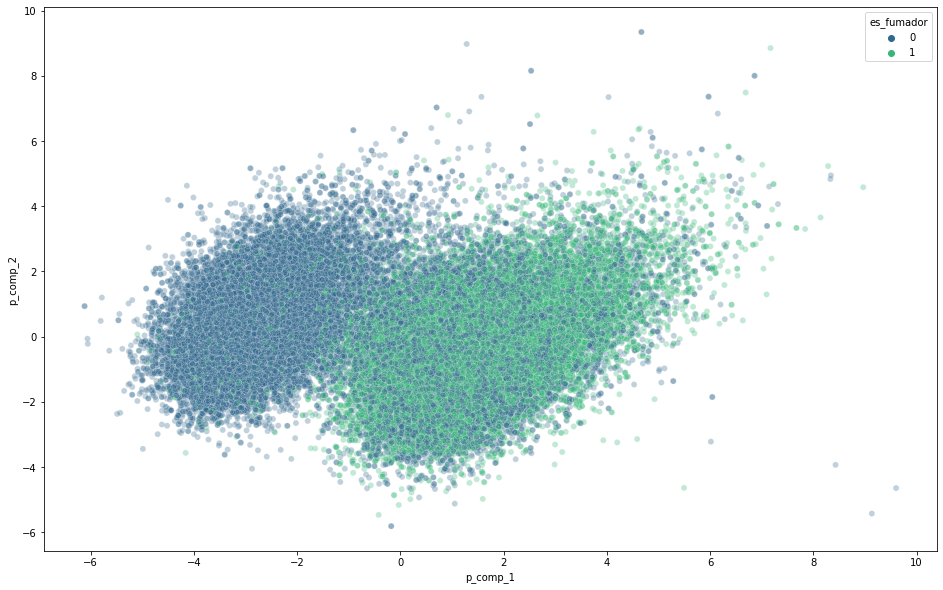

In [73]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="p_comp_1", y="p_comp_2",
    hue="es_fumador",
    palette=sns.color_palette("viridis", 2), 
    data=pca_df,
    legend="full",
    alpha=0.3
)
plt.show()

Vemos que la reducción de la dimensionalidad no separa a las categorias

#**Modelos**

### **Carga de modelos**

Dividimos dataset en X/y train y X/y test

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [75]:

#DECISION TREE
tree = DecisionTreeClassifier(class_weight=None, 
                              criterion='gini', 
                              max_depth=20,
                              max_features=None, 
                              max_leaf_nodes=None,
                              min_samples_leaf=6,
                              min_samples_split=200, 
                              min_weight_fraction_leaf=0.0,
                              random_state=None, 
                              splitter='best')

#RANDOM FOREST
rfc = RandomForestClassifier(random_state=11, 
                             n_estimators=200,
                             class_weight="balanced", 
                             max_features="log2")

#KNN
knn = KNeighborsClassifier(n_neighbors=2)

#LOGISTIC REGRESSION
rl = LogisticRegression()

#SVM
svml = svm.LinearSVC()
feature_map_nystroem = Nystroem(gamma=.2,
                                random_state=1,
                                n_components=300)

### **Entrenamiento**

Entrenamos los modelos con el DF y asignamos variables a x/y trest/train

In [76]:
#DECISION TREE
x_train_dt = x_train
y_train_dt = y_train
x_test_dt = x_test
y_test_dt = y_test

tree.fit(x_train_dt,y_train_dt)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=6, min_samples_split=200)

In [77]:
#RANDOM FOREST
x_train_rf = x_train
y_train_rf = y_train
x_test_rf = x_test
y_test_rf = y_test

rfc.fit(x_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [78]:
#KNN
x_train_knn = x_train
y_train_knn = y_train
x_test_knn = x_test
y_test_knn = y_test

knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=2)

In [79]:
#LOGISTIC REGRESSION
x_train_lr = x_train
y_train_lr = y_train
x_test_lr = x_test
y_test_lr = y_test
rl.fit(x_train_lr,y_train_lr)

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
#SVM
x_train_svm = feature_map_nystroem.fit_transform(x_train)
y_train_svm = y_train
x_test_svm = feature_map_nystroem.fit_transform(x_test)
y_test_svm = y_test

svml.fit(x_train_svm, y_train_svm)

LinearSVC()

### **Métricas**

Genero predicciones y las asigno a variables

In [81]:
#DECISION TREE
y_train_pred_dt = tree.predict(x_train_dt)
y_test_pred_dt = tree.predict(x_test_dt) 

In [82]:
#RANDOM FOREST
y_test_pred_rf = rfc.predict(x_test_rf)
y_train_pred_rf = rfc.predict(x_train_rf)

In [83]:
#KNN
y_train_pred_knn = knn.predict(x_train_knn)
y_test_pred_knn = knn.predict(x_test_knn) 

In [84]:
#LOGISTIC REGRESSION
y_test_pred_lr = rl.predict(x_test_lr)
y_train_pred_lr = rl.predict(x_train_lr)

In [85]:
#SVM
y_test_pred_svm = svml.predict(x_test_svm)
y_train_pred_svm = svml.predict(x_train_svm)

**Resultados sobre entrenamiento para cada modelo**

In [86]:
print('Accuracy del set de entrenamiento:')
print(f"Decision Tree: {accuracy_score(y_train_dt, y_train_pred_dt)}")
print(f"Random Forest: {accuracy_score(y_train_rf, y_train_pred_rf)}")
print(f"KNN: {accuracy_score(y_train_knn, y_train_pred_knn)}")
print(f"Regresión Logística: {accuracy_score(y_train_lr, y_train_pred_lr)}")
print(f"SVM: {accuracy_score(y_train_svm, y_train_pred_svm)}")

print('---------------------------------------------------')
print('Presición del set de entrenamiento:')
print(f"Decision Tree: {precision_score(y_train_dt, y_train_pred_dt)}")
print(f"Random Forest: {precision_score(y_train_rf, y_train_pred_rf)}")
print(f"KNN: {precision_score(y_train_knn, y_train_pred_knn)}")
print(f"Regresión Logística: {precision_score(y_train_lr, y_train_pred_lr)}")
print(f"SVM: {precision_score(y_train_svm, y_train_pred_svm)}")

print('---------------------------------------------------')
print('Recall del set de entrenamiento:')
print(f"Decision Tree: {recall_score(y_train_dt, y_train_pred_dt)}")
print(f"Random Forest: {recall_score(y_train_rf, y_train_pred_rf)}")
print(f"KNN: {recall_score(y_train_knn, y_train_pred_knn)}")
print(f"Regresión Logística: {recall_score(y_train_lr, y_train_pred_lr)}")
print(f"SVM: {recall_score(y_train_svm, y_train_pred_svm)}")

print('---------------------------------------------------')
print('F1 Score del set de entrenamiento:')
print(f"Decision Tree: {f1_score(y_train_dt, y_train_pred_dt)}")
print(f"Random Forest: {f1_score(y_train_rf, y_train_pred_rf)}")
print(f"KNN: {f1_score(y_train_knn, y_train_pred_knn)}")
print(f"Regresión Logística: {f1_score(y_train_lr, y_train_pred_lr)}")
print(f"SVM: {f1_score(y_train_svm, y_train_pred_svm)}")


Accuracy del set de entrenamiento:
Decision Tree: 0.7816304433939842
Random Forest: 1.0
KNN: 0.8019911796551087
Regresión Logística: 0.6981276573269601
SVM: 0.6382602265825125
---------------------------------------------------
Presición del set de entrenamiento:
Decision Tree: 0.6911663216011042
Random Forest: 1.0
KNN: 1.0
Regresión Logística: 0.6209070571486679
SVM: 1.0
---------------------------------------------------
Recall del set de entrenamiento:
Decision Tree: 0.7252516474762836
Random Forest: 1.0
KNN: 0.45702078354696213
Regresión Logística: 0.4421753928597292
SVM: 0.008038235933087117
---------------------------------------------------
F1 Score del set de entrenamiento:
Decision Tree: 0.7077988621506061
Random Forest: 1.0
KNN: 0.6273359840954275
Regresión Logística: 0.5165165165165165
SVM: 0.015948275862068966


De las métricas sobre el dataset de entrenamiento podemos concluir: 

*   Accuracy: Todos los modelos tienen un buen Accuracy, pero el Random Forest parece estar overfit 
*   Precision: Los modelos con mejores resultados son el Random Forest y KNN, pero también tienen un 100%, por lo que pueden estar overfit.
*   Recall: El modelo con los mejores resultados es el Random Forest también.
parece estar overfit
*   F1 Score: El mejor modelo es el Random Forest, seguido del Decision Tree

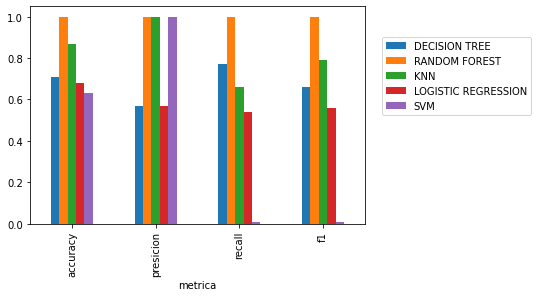

In [87]:
accuracy = [0.71,1,0.87,0.68,0.63]

presicion = [0.57,1,1,0.57,1.0]

recall = [0.77,1,0.66,0.54,0.006]

f1 = [0.66,1,0.79,0.56,0.01]

df_models = pd.DataFrame([accuracy,presicion,recall,f1])

df_models.columns=['DECISION TREE','RANDOM FOREST','KNN','LOGISTIC REGRESSION','SVM']

df_models['metrica'] = ['accuracy','presicion','recall','f1']

df_models.set_index('metrica', inplace = True)

df_models.plot.bar()
plt.legend(loc=(1.05, 0.5))

**Resultados sobre evaluación para cada modelo**

In [88]:
print(f"Accuracy Decision Tree: {accuracy_score(y_test_dt, y_test_pred_dt)}")
print(f"Presición Decision Tree: {precision_score(y_test_dt, y_test_pred_dt)}")
print(f"Recall Decision Tree: {recall_score(y_test_dt, y_test_pred_dt)}")
print(f"F1 Score Decision Tree: {f1_score(y_test_dt, y_test_pred_dt)}")

print('---------------------------------------------------')

print(f"Accuracy Random Forest: {accuracy_score(y_test_rf, y_test_pred_rf)}")
print(f"Presición Random Forest: {precision_score(y_test_rf, y_test_pred_rf)}")
print(f"Recall Random Forest: {recall_score(y_test_rf, y_test_pred_rf)}")
print(f"F1 Score Random Forest: {f1_score(y_test_rf, y_test_pred_rf)}")

print('---------------------------------------------------')

print(f"Accuracy KNN: {accuracy_score(y_test_knn, y_test_pred_knn)}")
print(f"Presición KNN: {precision_score(y_test_knn, y_test_pred_knn)}")
print(f"Recall KNN: {recall_score(y_test_knn, y_test_pred_knn)}")
print(f"F1 Score KNN: {f1_score(y_test_knn, y_test_pred_knn)}")

print('---------------------------------------------------')

print(f"Accuracy Regresión Logística: {accuracy_score(y_test_lr, y_test_pred_lr)}")
print(f"Presición Regresión Logística: {precision_score(y_test_lr, y_test_pred_lr)}")
print(f"Recall Regresión Logística: {recall_score(y_test_lr, y_test_pred_lr)}")
print(f"F1 Score Regresión Logística: {f1_score(y_test_lr, y_test_pred_lr)}")

print('---------------------------------------------------')

print(f"Accuracy SVM: {accuracy_score(y_test_svm, y_test_pred_svm)}")
print(f"Presición SVM: {precision_score(y_test_svm, y_test_pred_svm)}")
print(f"Recall SVM: {recall_score(y_test_svm, y_test_pred_svm)}")
print(f"F1 Score SVM: {f1_score(y_test_svm, y_test_pred_svm)}")


Accuracy Decision Tree: 0.743853595415614
Presición Decision Tree: 0.6393521488133419
Recall Decision Tree: 0.6763358778625954
F1 Score Decision Tree: 0.6573242106998599
---------------------------------------------------
Accuracy Random Forest: 0.8205065007086081
Presición Random Forest: 0.7461208319577418
Recall Random Forest: 0.7667514843087362
F1 Score Random Forest: 0.7562954906717978
---------------------------------------------------
Accuracy KNN: 0.6511183683529485
Presición KNN: 0.5444147922226458
Recall KNN: 0.24223918575063613
F1 Score KNN: 0.33528997417234085
---------------------------------------------------
Accuracy Regresión Logística: 0.706204941770904
Presición Regresión Logística: 0.6328696062249469
Recall Regresión Logística: 0.4553011026293469
F1 Score Regresión Logística: 0.5295974743488556
---------------------------------------------------
Accuracy SVM: 0.6350976646743484
Presición SVM: 0.3783783783783784
Recall SVM: 0.0071246819338422395
F1 Score SVM: 0.0139860

De las métricas sobre el dataset de evaluación podemos concluir: 

*   Accuracy: Los modelos con mejores resultados son el Random Forest y KNN
*   Precision: Los modelos con mejores resultados son el Random Forest y KNN
*   Recall: Los modelos con mejores resultados son el Random Forest y Decision Tree
*   F1 Score: Los modelos con mejores resultados son el Random Forest y Decision Tree

### **Matriz de confusión**

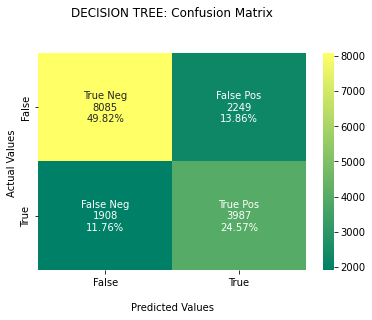

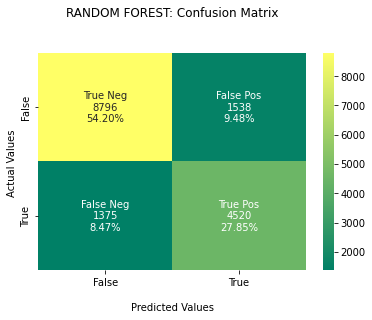

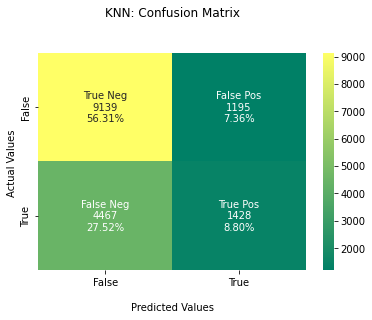

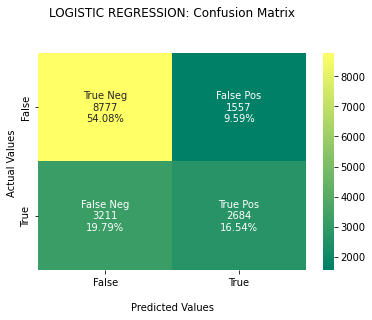

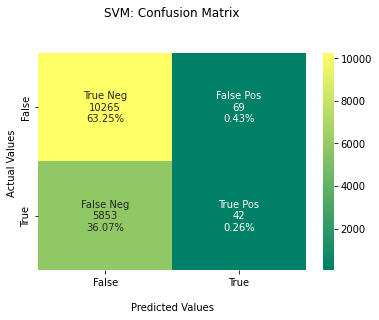

In [114]:
# DECISION TREE
cm_dt = confusion_matrix(y_test_dt, y_test_pred_dt)

group_names_dt = ['True Neg','False Pos','False Neg','True Pos']

group_counts_dt = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]

group_percentages_dt = ["{0:.2%}".format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]

labels_dt = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_dt,group_counts_dt,group_percentages_dt)]

labels_dt = np.asarray(labels_dt).reshape(2,2)

ax = sns.heatmap(cm_dt, annot=labels_dt, fmt='', cmap='summer')

ax.set_title('DECISION TREE: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#RANDOM FOREST
cm_rf = confusion_matrix(y_test_rf, y_test_pred_rf)

group_names_rf = ['True Neg','False Pos','False Neg','True Pos']

group_counts_rf = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]

group_percentages_rf = ["{0:.2%}".format(value) for value in
                     cm_rf.flatten()/np.sum(cm_rf)]

labels_rf = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_rf,group_counts_rf,group_percentages_rf)]

labels_rf = np.asarray(labels_rf).reshape(2,2)

ax = sns.heatmap(cm_rf, annot=labels_rf, fmt='', cmap='summer')

ax.set_title('RANDOM FOREST: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#KNN
cm_knn = confusion_matrix(y_test_knn, y_test_pred_knn)

group_names_knn = ['True Neg','False Pos','False Neg','True Pos']

group_counts_knn = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]

group_percentages_knn = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]

labels_knn = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_knn,group_counts_knn,group_percentages_knn)]

labels_knn = np.asarray(labels_knn).reshape(2,2)

ax = sns.heatmap(cm_knn, annot=labels_knn, fmt='', cmap='summer')

ax.set_title('KNN: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#LOGISTIC REGRESSION
cm_lr = confusion_matrix(y_test_lr, y_test_pred_lr)

group_names_lr = ['True Neg','False Pos','False Neg','True Pos']

group_counts_lr = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]

group_percentages_lr = ["{0:.2%}".format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]

labels_lr = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_lr,group_counts_lr,group_percentages_lr)]

labels_lr = np.asarray(labels_lr).reshape(2,2)

ax = sns.heatmap(cm_lr, annot=labels_lr, fmt='', cmap='summer')

ax.set_title('LOGISTIC REGRESSION: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#SVM
cm_svm = confusion_matrix(y_test_svm, y_test_pred_svm)

group_names_svm = ['True Neg','False Pos','False Neg','True Pos']

group_counts_svm = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]

group_percentages_svm = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]

labels_svm = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names_svm,group_counts_svm,group_percentages_svm)]

labels_svm = np.asarray(labels_svm).reshape(2,2)

ax = sns.heatmap(cm_svm, annot=labels_svm, fmt='', cmap='summer')

ax.set_title('SVM: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Con la matriz de confusión podemos ver que los modelos tienden a predecir mejor cuando una persona no es fumadora, que cuando lo es.

### **ROC**

DECISION TREE AUC: 0.8237515087674718


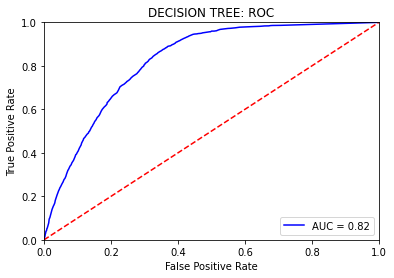

RANDOM FOREST AUC: 0.9048056654967512


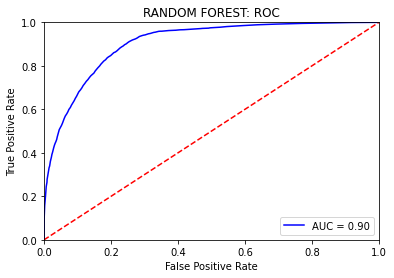

KNN AUC: 0.6176820899513501


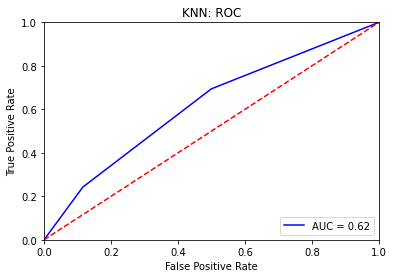

LOGISTIC REGRESSION AUC: 0.7601546842664506


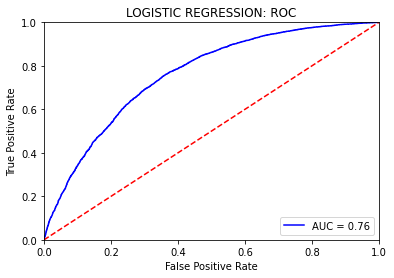

In [90]:
#DECISION TREE
class_probabilities = tree.predict_proba(x_test_dt)
preds_dt = class_probabilities[:, 1]

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test_dt, preds_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# AUC
print(f"DECISION TREE AUC: {roc_auc_dt}")

# Gráfica de la Curva ROC
plt.title('DECISION TREE: ROC')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#RANDOM FOREST
class_probabilities_rf = rfc.predict_proba(x_test_rf)
preds_rf = class_probabilities_rf[:, 1]

fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test_rf, preds_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# AUC
print(f"RANDOM FOREST AUC: {roc_auc_rf}")

# Gráfica de la Curva ROC
plt.title('RANDOM FOREST: ROC')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#KNN
class_probabilities_knn = knn.predict_proba(x_test_knn)
preds_knn = class_probabilities_knn[:, 1]

fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test_knn, preds_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# AUC
print(f"KNN AUC: {roc_auc_knn}")

# Gráfica de la Curva ROC
plt.title('KNN: ROC')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#LOGISTIC REGRESSION
class_probabilities_lr = rl.predict_proba(x_test_lr)
preds_lr = class_probabilities_lr[:, 1]

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test_lr, preds_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# AUC
print(f"LOGISTIC REGRESSION AUC: {roc_auc_lr}")

# Gráfica de la Curva ROC
plt.title('LOGISTIC REGRESSION: ROC')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Aqui podemos ver que el modelo con la mejor puntuacion AUC es el Random Forest

#**Fine Tuning**

### **StratifiedKFold**

In [91]:
#DECISION TREE

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(tree, x_train_dt, y_train_dt, scoring='accuracy', cv=skf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.742 (0.007)


In [92]:
#RANDOM FOREST

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(rfc, x_train_rf, y_train_rf, scoring='accuracy', cv=skf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.812 (0.004)


In [93]:
#KNN

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(knn, x_train_knn, y_train_knn, scoring='accuracy', cv=skf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.640 (0.004)


In [94]:
#LOGISTIC REGRESSION

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(rl, x_train_lr, y_train_lr, scoring='accuracy', cv=skf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.698 (0.004)


In [95]:
#SVM

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(svml, x_train_svm, y_train_svm, scoring='accuracy', cv=skf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.635 (0.000)


Viendo los resultados luego de utilizar SKF, vemos que el mejor modelo sigue siendo el random forest.

## *RandomizedSearchCV*

In [96]:
#RANDOM FOREST
params1 = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

h_rf = RandomForestClassifier()

cv_rf = RandomizedSearchCV(h_rf, params1, n_iter=100, random_state = 42, cv=5,scoring='roc_auc',verbose=20)

cv_rf.fit(x_train_rf, y_train_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.892 total time=  15.6s
[CV 2/5; 1/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.892 total time=  20.7s
[CV 3/5; 1/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.892 total time=  25.3s
[CV 4/5; 1/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.897 total time=  22.7s
[CV 5/5; 1/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.891 total time=  22.8s
[CV 1/5; 2/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.881 total time=  18.3s
[CV 2/5; 2/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.881 total time=  19.1s
[CV 3/5; 2/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.880 total time=  13.9s
[CV 4/5; 2/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.886 total time=  14.8s
[CV 5/5; 2/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.881 total time=  12.5s
[CV 1/5; 3/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 1/5; 3/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.892 total time=  20.1s
[CV 2/5; 3/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 2/5; 3/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.890 total time=  19.6s
[CV 3/5; 3/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=180
[CV 3/5; 3/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.898 total time=  18.9s
[CV 2/5; 4/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.898 total time=  16.6s
[CV 3/5; 4/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.898 total time=  18.6s
[CV 4/5; 4/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.902 total time=  17.6s
[CV 5/5; 4/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.897 total time=  19.1s
[CV 1/5; 5/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.890 total time=  13.7s
[CV 2/5; 5/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.891 total time=  16.3s
[CV 3/5; 5/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.891 total time=  13.0s
[CV 4/5; 5/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.896 total time=  11.5s
[CV 5/5; 5/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.890 total time=  16.4s
[CV 1/5; 6/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.899 total time=  27.9s
[CV 2/5; 6/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.898 total time=  26.1s
[CV 3/5; 6/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.899 total time=  27.0s
[CV 4/5; 6/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.903 total time=  27.2s
[CV 5/5; 6/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.896 total time=  26.8s
[CV 1/5; 7/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 1/5; 7/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.881 total time=  14.2s
[CV 2/5; 7/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 2/5; 7/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.880 total time=  16.3s
[CV 3/5; 7/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180
[CV 3/5; 7/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, sco

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/100] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  23.5s
[CV 2/5; 9/100] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/100] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  21.7s
[CV 3/5; 9/100] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/100] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.890 total time=  22.7s
[CV 4/5; 9/100] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/100] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.897 total time=  30.4s
[CV 5/5; 9/100] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/100] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.891 total time=  20.9s
[CV 1/5; 10/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.879 total time=  11.8s
[CV 2/5; 10/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.878 total time=  13.1s
[CV 3/5; 10/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.879 total time=  12.8s
[CV 4/5; 10/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.884 total time=  16.4s
[CV 5/5; 10/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.878 total time=  13.4s
[CV 1/5; 11/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 1/5; 11/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.893 total time=  22.0s
[CV 2/5; 11/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 2/5; 11/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.892 total time=  21.7s
[CV 3/5; 11/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 3/5; 11/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_es

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 13/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.891 total time=  19.2s
[CV 2/5; 13/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 13/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.890 total time=  17.7s
[CV 3/5; 13/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 13/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.890 total time=  17.5s
[CV 4/5; 13/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 13/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.895 total time=  17.3s
[CV 5/5; 13/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 13/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.888 total time=  18.5s
[CV 1/5; 14/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=130
[CV 1/5; 14/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.890 total time=   9.4s
[CV 2/5; 14/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=130
[CV 2/5; 14/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.892 total time=   9.4s
[CV 3/5; 14/100] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=130
[CV 3/5; 14/100] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=13

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 17/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.887 total time=  15.8s
[CV 2/5; 17/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 17/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.887 total time=  15.5s
[CV 3/5; 17/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 17/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.886 total time=  15.6s
[CV 4/5; 17/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 17/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.893 total time=  15.5s
[CV 5/5; 17/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 17/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.886 total time=  15.2s
[CV 1/5; 18/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 1/5; 18/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.899 total time=  23.9s
[CV 2/5; 18/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 2/5; 18/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.898 total time=  24.2s
[CV 3/5; 18/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 3/5; 18/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 19/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.853 total time=  11.2s
[CV 2/5; 19/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 19/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.853 total time=  10.9s
[CV 3/5; 19/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 19/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.854 total time=  11.7s
[CV 4/5; 19/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 19/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.860 total time=  11.5s
[CV 5/5; 19/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 19/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.852 total time=  11.5s
[CV 1/5; 20/100] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130
[CV 1/5; 20/100] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=0.888 total time=   9.3s
[CV 2/5; 20/100] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130
[CV 2/5; 20/100] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130;, score=0.889 total time=   9.7s
[CV 3/5; 20/100] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130
[CV 3/5; 20/100] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 22/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  31.9s
[CV 2/5; 22/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 22/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.898 total time=  33.4s
[CV 3/5; 22/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 22/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  31.0s
[CV 4/5; 22/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 22/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.905 total time=  30.1s
[CV 5/5; 22/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 22/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  30.8s
[CV 1/5; 23/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 23/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.891 total time=  16.6s
[CV 2/5; 23/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 23/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.891 total time=  16.2s
[CV 3/5; 23/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 23/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.890 total time=  15.6s
[CV 4/5; 23/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 23/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.896 total time=  16.0s
[CV 5/5; 23/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 23/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.889 total time=  16.8s
[CV 1/5; 24/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=230
[CV 1/5; 24/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.880 total time=  18.3s
[CV 2/5; 24/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=230
[CV 2/5; 24/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.879 total time=  19.5s
[CV 3/5; 24/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=230
[CV 3/5; 24/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=2

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 27/100] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  17.5s
[CV 2/5; 27/100] START bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 27/100] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  18.5s
[CV 3/5; 27/100] START bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 27/100] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.893 total time=  18.8s
[CV 4/5; 27/100] START bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 27/100] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.897 total time=  19.1s
[CV 5/5; 27/100] START bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 27/100] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.890 total time=  18.9s
[CV 1/5; 28/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 28/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.896 total time=  21.2s
[CV 2/5; 28/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 28/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.896 total time=  22.4s
[CV 3/5; 28/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 28/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.897 total time=  25.5s
[CV 4/5; 28/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 28/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.901 total time=  20.2s
[CV 5/5; 28/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 28/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.895 total time=  18.3s
[CV 1/5; 29/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 1/5; 29/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230;, score=0.896 total time=  25.5s
[CV 2/5; 29/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 2/5; 29/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230;, score=0.895 total time=  25.6s
[CV 3/5; 29/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=230
[CV 3/5; 29/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_es

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 30/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.880 total time=   9.2s
[CV 2/5; 30/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 30/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.881 total time=   9.3s
[CV 3/5; 30/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 30/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.880 total time=   9.0s
[CV 4/5; 30/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 30/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.886 total time=  11.9s
[CV 5/5; 30/100] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 30/100] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.879 total time=  12.8s
[CV 1/5; 31/100] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 31/100] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.899 total time=  34.6s
[CV 2/5; 31/100] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 31/100] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.897 total time=  31.8s
[CV 3/5; 31/100] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 31/100] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.897 total time=  29.7s
[CV 4/5; 31/100] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 31/100] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.903 total time=  27.5s
[CV 5/5; 31/100] START bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 31/100] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=230;, score=0.897 total time=  28.8s
[CV 1/5; 32/100] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 32/100] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.891 total time=  12.4s
[CV 2/5; 32/100] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 32/100] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.891 total time=  11.4s
[CV 3/5; 32/100] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 32/100] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.890 total time=  12.1s
[CV 4/5; 32/100] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 32/100] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.896 total time=  12.5s
[CV 5/5; 32/100] START bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 32/100] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.888 total time=  12.2s
[CV 1/5; 33/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 33/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.891 total time=  16.1s
[CV 2/5; 33/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 33/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.892 total time=  15.2s
[CV 3/5; 33/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 33/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.890 total time=  16.2s
[CV 4/5; 33/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 33/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.895 total time=  17.4s
[CV 5/5; 33/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 33/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.890 total time=  20.1s
[CV 1/5; 34/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 1/5; 34/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.894 total time=  20.1s
[CV 2/5; 34/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 2/5; 34/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.894 total time=  20.5s
[CV 3/5; 34/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 3/5; 34/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 35/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.883 total time=  15.2s
[CV 2/5; 35/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 35/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.882 total time=  18.6s
[CV 3/5; 35/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 35/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.881 total time=  19.9s
[CV 4/5; 35/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 35/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.890 total time=  17.1s
[CV 5/5; 35/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 35/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.882 total time=  17.0s
[CV 1/5; 36/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 36/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.885 total time=  18.0s
[CV 2/5; 36/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 36/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.886 total time=  17.3s
[CV 3/5; 36/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 36/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.886 total time=  16.0s
[CV 4/5; 36/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 36/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.891 total time=  16.5s
[CV 5/5; 36/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 36/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.885 total time=  14.1s
[CV 1/5; 37/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 37/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.891 total time=  32.7s
[CV 2/5; 37/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 37/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  35.6s
[CV 3/5; 37/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 37/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  34.4s
[CV 4/5; 37/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 37/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.896 total time=  21.4s
[CV 5/5; 37/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 37/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.890 total time=  20.9s
[CV 1/5; 38/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 1/5; 38/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.889 total time=  20.2s
[CV 2/5; 38/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 2/5; 38/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.888 total time=  20.1s
[CV 3/5; 38/100] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 3/5; 38/100] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 39/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.881 total time=   8.2s
[CV 2/5; 39/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 39/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.882 total time=   7.9s
[CV 3/5; 39/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 39/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.884 total time=   7.8s
[CV 4/5; 39/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 39/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.888 total time=   7.8s
[CV 5/5; 39/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 39/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.883 total time=   8.0s
[CV 1/5; 40/100] START bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180
[CV 1/5; 40/100] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.897 total time=  12.4s
[CV 2/5; 40/100] START bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180
[CV 2/5; 40/100] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.896 total time=  12.3s
[CV 3/5; 40/100] START bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180
[CV 3/5; 40/100] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 41/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.878 total time=  12.6s
[CV 2/5; 41/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 41/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.876 total time=  13.0s
[CV 3/5; 41/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 41/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.875 total time=  11.4s
[CV 4/5; 41/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 41/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.883 total time=  10.0s
[CV 5/5; 41/100] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 41/100] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.877 total time=   8.4s
[CV 1/5; 42/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180
[CV 1/5; 42/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180;, score=0.897 total time=  19.4s
[CV 2/5; 42/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180
[CV 2/5; 42/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180;, score=0.898 total time=  20.4s
[CV 3/5; 42/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180
[CV 3/5; 42/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 44/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.852 total time=   9.3s
[CV 2/5; 44/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 44/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.853 total time=   7.9s
[CV 3/5; 44/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 44/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.853 total time=   8.6s
[CV 4/5; 44/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 44/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.859 total time=   8.8s
[CV 5/5; 44/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 44/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.852 total time=   7.9s
[CV 1/5; 45/100] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 1/5; 45/100] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.900 total time=  26.7s
[CV 2/5; 45/100] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 2/5; 45/100] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230;, score=0.901 total time=  26.5s
[CV 3/5; 45/100] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=230
[CV 3/5; 45/100] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 47/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.891 total time=  25.6s
[CV 2/5; 47/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 47/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  25.0s
[CV 3/5; 47/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 47/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.891 total time=  25.0s
[CV 4/5; 47/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 47/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.898 total time=  24.5s
[CV 5/5; 47/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 47/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.891 total time=  25.6s
[CV 1/5; 48/100] START bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 1/5; 48/100] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.890 total time=  10.7s
[CV 2/5; 48/100] START bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 2/5; 48/100] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=130;, score=0.891 total time=   9.8s
[CV 3/5; 48/100] START bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=130
[CV 3/5; 48/100] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 49/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  27.9s
[CV 2/5; 49/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 49/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  26.7s
[CV 3/5; 49/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 49/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.899 total time=  28.6s
[CV 4/5; 49/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 49/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.904 total time=  27.6s
[CV 5/5; 49/100] START bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 49/100] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.898 total time=  28.5s
[CV 1/5; 50/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230
[CV 1/5; 50/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.893 total time=  25.4s
[CV 2/5; 50/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230
[CV 2/5; 50/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.893 total time=  26.2s
[CV 3/5; 50/100] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230
[CV 3/5; 50/100] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 52/100] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.881 total time=  17.5s
[CV 2/5; 52/100] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 52/100] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.882 total time=  17.7s
[CV 3/5; 52/100] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 52/100] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.881 total time=  17.3s
[CV 4/5; 52/100] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 52/100] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.887 total time=  18.1s
[CV 5/5; 52/100] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 52/100] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=230;, score=0.882 total time=  17.2s
[CV 1/5; 53/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 53/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.898 total time=  21.6s
[CV 2/5; 53/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 53/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.899 total time=  23.0s
[CV 3/5; 53/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 53/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.900 total time=  22.3s
[CV 4/5; 53/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 53/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.904 total time=  22.5s
[CV 5/5; 53/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 53/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.897 total time=  23.5s
[CV 1/5; 54/100] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180
[CV 1/5; 54/100] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.891 total time=  19.8s
[CV 2/5; 54/100] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180
[CV 2/5; 54/100] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180;, score=0.891 total time=  18.2s
[CV 3/5; 54/100] START bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180
[CV 3/5; 54/100] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 56/100] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.850 total time=  11.7s
[CV 2/5; 56/100] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 56/100] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.852 total time=  12.4s
[CV 3/5; 56/100] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 56/100] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.852 total time=  12.2s
[CV 4/5; 56/100] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 56/100] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.857 total time=  13.4s
[CV 5/5; 56/100] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 56/100] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=230;, score=0.851 total time=  19.0s
[CV 1/5; 57/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 57/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.892 total time=  25.4s
[CV 2/5; 57/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 57/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.892 total time=  25.3s
[CV 3/5; 57/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 57/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.893 total time=  22.3s
[CV 4/5; 57/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 57/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.898 total time=  23.4s
[CV 5/5; 57/100] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 57/100] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.890 total time=  27.5s
[CV 1/5; 58/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 1/5; 58/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.899 total time=  28.0s
[CV 2/5; 58/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 2/5; 58/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.899 total time=  26.3s
[CV 3/5; 58/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 3/5; 58/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 59/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.853 total time=   9.5s
[CV 2/5; 59/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 59/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.853 total time=  10.4s
[CV 3/5; 59/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 59/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.853 total time=   9.5s
[CV 4/5; 59/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 59/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.859 total time=  10.0s
[CV 5/5; 59/100] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 59/100] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.853 total time=  11.0s
[CV 1/5; 60/100] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 1/5; 60/100] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.851 total time=   6.9s
[CV 2/5; 60/100] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 2/5; 60/100] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.852 total time=   7.7s
[CV 3/5; 60/100] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 3/5; 60/100] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 65/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.900 total time=  18.8s
[CV 2/5; 65/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 65/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.900 total time=  22.2s
[CV 3/5; 65/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 65/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.900 total time=  18.8s
[CV 4/5; 65/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 65/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.905 total time=  17.9s
[CV 5/5; 65/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 65/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.900 total time=  17.5s
[CV 1/5; 66/100] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 66/100] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.883 total time=  10.1s
[CV 2/5; 66/100] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 66/100] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.882 total time=  10.3s
[CV 3/5; 66/100] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 66/100] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.882 total time=  10.2s
[CV 4/5; 66/100] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 66/100] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.888 total time=  10.5s
[CV 5/5; 66/100] START bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 66/100] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.880 total time=  10.5s
[CV 1/5; 67/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 67/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.893 total time=  11.6s
[CV 2/5; 67/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 67/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.894 total time=  11.5s
[CV 3/5; 67/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 67/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.892 total time=  12.0s
[CV 4/5; 67/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 67/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.898 total time=  11.6s
[CV 5/5; 67/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 67/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130;, score=0.894 total time=  11.8s
[CV 1/5; 68/100] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 1/5; 68/100] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  19.9s
[CV 2/5; 68/100] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 2/5; 68/100] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230;, score=0.892 total time=  20.0s
[CV 3/5; 68/100] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230
[CV 3/5; 68/100] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 71/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  11.7s
[CV 2/5; 71/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 71/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  11.9s
[CV 3/5; 71/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 71/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  12.1s
[CV 4/5; 71/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 71/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.897 total time=  11.8s
[CV 5/5; 71/100] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 71/100] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.891 total time=  11.7s
[CV 1/5; 72/100] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130
[CV 1/5; 72/100] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.891 total time=  12.0s
[CV 2/5; 72/100] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130
[CV 2/5; 72/100] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130;, score=0.892 total time=  12.0s
[CV 3/5; 72/100] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130
[CV 3/5; 72/100] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 75/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.895 total time=  12.8s
[CV 2/5; 75/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 75/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.894 total time=  12.9s
[CV 3/5; 75/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 75/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.895 total time=  13.1s
[CV 4/5; 75/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 75/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.900 total time=  13.1s
[CV 5/5; 75/100] START bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 75/100] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.895 total time=  13.0s
[CV 1/5; 76/100] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 1/5; 76/100] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.899 total time=  13.7s
[CV 2/5; 76/100] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 2/5; 76/100] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.900 total time=  13.8s
[CV 3/5; 76/100] START bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 3/5; 76/100] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 78/100] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.899 total time=  24.1s
[CV 2/5; 78/100] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 78/100] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.900 total time=  24.4s
[CV 3/5; 78/100] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 78/100] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.898 total time=  24.6s
[CV 4/5; 78/100] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 78/100] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.904 total time=  24.4s
[CV 5/5; 78/100] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 78/100] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=230;, score=0.898 total time=  25.4s
[CV 1/5; 79/100] START bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 79/100] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.894 total time=   9.7s
[CV 2/5; 79/100] START bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 79/100] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.894 total time=   9.7s
[CV 3/5; 79/100] START bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 79/100] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.895 total time=  10.0s
[CV 4/5; 79/100] START bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 79/100] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.900 total time=   9.9s
[CV 5/5; 79/100] START bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 79/100] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.894 total time=  10.5s
[CV 1/5; 80/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130
[CV 1/5; 80/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.891 total time=  13.3s
[CV 2/5; 80/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130
[CV 2/5; 80/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130;, score=0.892 total time=  13.4s
[CV 3/5; 80/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=130
[CV 3/5; 80/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 82/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.895 total time=  14.7s
[CV 2/5; 82/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 82/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.895 total time=  14.6s
[CV 3/5; 82/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 82/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.896 total time=  15.0s
[CV 4/5; 82/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 82/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.900 total time=  15.2s
[CV 5/5; 82/100] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 82/100] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=180;, score=0.894 total time=  14.9s
[CV 1/5; 83/100] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 1/5; 83/100] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.894 total time=  21.7s
[CV 2/5; 83/100] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 2/5; 83/100] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180;, score=0.896 total time=  21.9s
[CV 3/5; 83/100] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=180
[CV 3/5; 83/100] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_es

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 86/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.891 total time=  23.3s
[CV 2/5; 86/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 86/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.889 total time=  23.2s
[CV 3/5; 86/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 86/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.889 total time=  23.4s
[CV 4/5; 86/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 86/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.895 total time=  24.8s
[CV 5/5; 86/100] START bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 86/100] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=180;, score=0.889 total time=  25.1s
[CV 1/5; 87/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 1/5; 87/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.896 total time=1075.6min
[CV 2/5; 87/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 2/5; 87/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130;, score=0.896 total time=  14.0s
[CV 3/5; 87/100] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130
[CV 3/5; 87/100] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 88/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.880 total time=   5.9s
[CV 2/5; 88/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 88/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.880 total time=   6.9s
[CV 3/5; 88/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 88/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.877 total time=   6.8s
[CV 4/5; 88/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 88/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.884 total time=   6.5s
[CV 5/5; 88/100] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 88/100] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.878 total time=   6.5s
[CV 1/5; 89/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 1/5; 89/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.891 total time=   7.0s
[CV 2/5; 89/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 2/5; 89/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130;, score=0.890 total time=   6.9s
[CV 3/5; 89/100] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=130
[CV 3/5; 89/100] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 90/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.900 total time=  10.5s
[CV 2/5; 90/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 90/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.897 total time=  10.9s
[CV 3/5; 90/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 90/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.898 total time=  13.8s
[CV 4/5; 90/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 90/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.903 total time=  13.5s
[CV 5/5; 90/100] START bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 90/100] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130;, score=0.897 total time=  13.5s
[CV 1/5; 91/100] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 1/5; 91/100] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.854 total time=   9.8s
[CV 2/5; 91/100] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 2/5; 91/100] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180;, score=0.854 total time=   9.7s
[CV 3/5; 91/100] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=180
[CV 3/5; 91/100] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 92/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.893 total time=  20.9s
[CV 2/5; 92/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 92/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.892 total time=  14.5s
[CV 3/5; 92/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 92/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.892 total time=  15.5s
[CV 4/5; 92/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 92/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.897 total time=  14.7s
[CV 5/5; 92/100] START bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 92/100] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180;, score=0.890 total time=  13.3s
[CV 1/5; 93/100] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 1/5; 93/100] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.880 total time=   6.0s
[CV 2/5; 93/100] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 2/5; 93/100] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130;, score=0.880 total time=   7.4s
[CV 3/5; 93/100] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=130
[CV 3/5; 93/100] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 95/100] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.882 total time=   9.4s
[CV 2/5; 95/100] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 95/100] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.884 total time=   9.5s
[CV 3/5; 95/100] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 95/100] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.884 total time=   9.5s
[CV 4/5; 95/100] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 95/100] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.889 total time=   8.6s
[CV 5/5; 95/100] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 95/100] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=180;, score=0.882 total time=  10.3s
[CV 1/5; 96/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 96/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230;, score=0.885 total time=  12.5s
[CV 2/5; 96/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 96/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230;, score=0.884 total time=  12.2s
[CV 3/5; 96/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 96/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230;, score=0.884 total time=  12.6s
[CV 4/5; 96/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 96/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230;, score=0.889 total time=  12.3s
[CV 5/5; 96/100] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230


c:\Users\leonardo.rosa\Anaconda3\envs\data_science\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 96/100] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230;, score=0.882 total time=  12.4s
[CV 1/5; 97/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230
[CV 1/5; 97/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.898 total time=  19.8s
[CV 2/5; 97/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230
[CV 2/5; 97/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230;, score=0.900 total time=  20.4s
[CV 3/5; 97/100] START bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230
[CV 3/5; 97/100] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, scoring='roc_auc', verbose=20)

In [104]:
print("Mejores parametros: "+str(cv_rf.best_params_))
print("Mejor Score: "+str(cv_rf.best_score_))
pred_cv_rf = cv_rf.predict(x_test_rf)
print('Exactitud:', accuracy_score(y_test_rf, pred_cv_rf))

Mejores parametros: {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}
Mejor Score: 0.9014081099665926
Exactitud: 0.8241419680818288


# **Re-training**

In [105]:
#RANDOM FOREST
rfc_v2 = RandomForestClassifier(n_estimators=130,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                max_features="sqrt",
                                max_depth=90,
                                bootstrap=False)

In [106]:
#RANDOM FOREST
x_train_rf_v2 = x_train
y_train_rf_v2 = y_train
x_test_rf_v2 = x_test
y_test_rf_v2 = y_test

rfc_v2.fit(x_train_rf_v2, y_train_rf_v2)

RandomForestClassifier(bootstrap=False, max_depth=90, n_estimators=130)

In [107]:
#RANDOM FOREST
y_test_pred_rf_v2 = rfc_v2.predict(x_test_rf_v2)
y_train_pred_rf_v2 = rfc_v2.predict(x_train_rf_v2)

In [110]:
print(f"Accuracy Random Forest: {accuracy_score(y_test_rf_v2, y_test_pred_rf_v2)}")
print(f"Presición Random Forest: {precision_score(y_test_rf_v2, y_test_pred_rf_v2)}")
print(f"Recall Random Forest: {recall_score(y_test_rf_v2, y_test_pred_rf_v2)}")
print(f"F1 Score Random Forest: {f1_score(y_test_rf_v2, y_test_pred_rf_v2)}")

Accuracy Random Forest: 0.8208145911639657
Presición Random Forest: 0.7400739430959653
Recall Random Forest: 0.7810008481764207
F1 Score Random Forest: 0.7599867943215582


RANDOM FOREST AUC: 0.9112443291436669


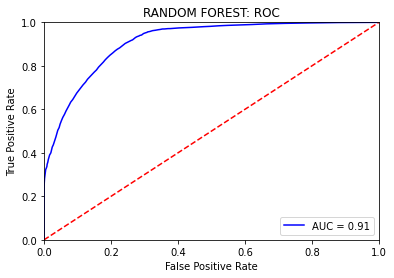

In [113]:
#RANDOM FOREST
class_probabilities_rfc_v2 = rfc_v2.predict_proba(x_test_rf_v2)
preds_rfc_v2 = class_probabilities_rfc_v2[:, 1]

fpr_rfc_v2, tpr_rfc_v2, threshold_rfc_v2 = roc_curve(y_test_rf_v2, preds_rfc_v2)
roc_auc_rfc_v2 = auc(fpr_rfc_v2, tpr_rfc_v2)

# AUC
print(f"RANDOM FOREST AUC: {roc_auc_rfc_v2}")

# Gráfica de la Curva ROC
plt.title('RANDOM FOREST: ROC')
plt.plot(fpr_rfc_v2, tpr_rfc_v2, 'b', label = 'AUC = %0.2f' % roc_auc_rfc_v2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


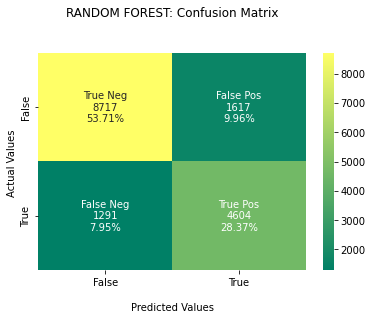

In [112]:
#RANDOM FOREST
cm_rf_v2 = confusion_matrix(y_test_rf_v2, y_test_pred_rf_v2)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf_v2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_rf_v2.flatten()/np.sum(cm_rf_v2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_rf_v2, annot=labels, fmt='', cmap='summer')

ax.set_title('RANDOM FOREST: Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()
